# 问题
用四阶龙格-库塔(Runge-Kutta)方法求解常微分方程初值问题
## 求解题目
$$\left\{\begin{array}{l}{y^{\prime}=x y} \\ {y(0)=1}\end{array}\right.$$
步长$h=0.1$

# 问题求解

In [1]:
def f(x,y):
    """dy/dt =xy"""
    return x*y

## 四阶龙格-库塔算法

In [2]:
def RK(a,b,h,y_0):
    """a,b为求解区间，
       h为步长
       y_0为起点a处的纵坐标"""
    x=[]
    y=[]
    x.append(a)
    y.append(y_0)
    n=int((b-a)/h)    #递推次数
    for i in range(n):
        x.append(round(x[i]+h,1))
        k1=round(f(x[i],y[i]),8)
        k2=round(f(x[i]+h/2,y[i]+k1*h/2),8)
        k3=round(f(x[i]+h/2,y[i]+k2*h/2),8)
        k4=round(f(x[i]+h,y[i]+k3*h),8)
        y.append(round(y[i]+h*(k1+2*k2+2*k3+k4)/6,8))
    #output
    print("x\ty")
    for i in range(n+1):
        print(str(x[i])+"\t"+str(y[i]))
        
    return y

In [3]:
y=RK(0,1,0.1,1)

x	y
0	1
0.1	1.00501252
0.2	1.02020134
0.3	1.04602786
0.4	1.08328707
0.5	1.13314845
0.6	1.19721735
0.7	1.27762128
0.8	1.3771277
0.9	1.49930237
1.0	1.64872102


## 标准结果
将借助scipy求得的结果作为标准结果

In [4]:
from scipy import linspace
from scipy.integrate import odeint
import numpy as np
def solve_first_order_ode():
    """ 求解一阶ODE"""
    xb = linspace(0,1,11)
    y0 = [1] # 为了兼容solve_ivp函数，这里初值要array类型
    
    yb = odeint(f,y0,xb,tfirst=True) # 使用tfirst参数
    print("x\ty")
    for i in range(len(xb)):
        print(str(round(xb[i],1))+"\t"+str(yb[i]))
    return yb

In [5]:
yb=solve_first_order_ode()

x	y
0.0	[1.]
0.1	[1.00501264]
0.2	[1.02020146]
0.3	[1.04602799]
0.4	[1.08328721]
0.5	[1.13314861]
0.6	[1.19721755]
0.7	[1.27762152]
0.8	[1.37712799]
0.9	[1.49930276]
1.0	[1.64872157]


# 结果分析

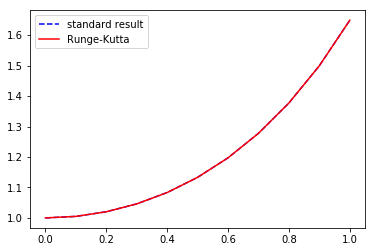

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
x = linspace(0,1,11)
plt.plot(x,yb,'b--',label="standard result")
plt.plot(x,y,'r-',label="Runge-Kutta")    
plt.legend()
plt.show()